Name : AASHI AGGARWAL <br>   
Student ID: 8920299 <br>   
Section: 2

1. Importing all the required libraries.

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Q1.a  Detect and handle outliers for the “median_house_value” field using: <br>
a. Apply the whiskers approach to identify outlier rows. <br>

<h2>
1. Loading data <br>
2. Finding Quartiles <br>
3. Calculating whiskers <br>
4. Detecting outliers based on left and right whiskers
</h2>

In [10]:
df = pd.read_csv('housing_dataset.csv') 

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

left = Q1 - 1.5 * IQR
right = Q3 + 1.5 * IQR

outliers = df[(df['median_house_value'] < left) | (df['median_house_value'] > right)]


print("Left whisker: ",left)
print("Right Whisker: ",right)
print("Outlier: ")
outliers




Left whisker:  -96337.5
Right Whisker:  482162.5
Outlier: 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19568,-118.37,33.81,33.0,5057.0,790.0,2021.0,748.0,6.8553,482200.0,NEAR OCEAN
19569,-117.19,32.69,35.0,2921.0,438.0,1042.0,415.0,6.3612,482700.0,NEAR OCEAN
19570,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0,<1H OCEAN
19571,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0,<1H OCEAN
19572,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


Q-1 b: Apply Z-score normalization and choose appropriate threshold to match the
outliers from the whiskers approach. <br>
<h2>
1. Finding z-score <br>
2. Choosing a suitable threshold for outlier detection (e.g., 3 standard deviations) <br>
3. Detecting outliers less than threshhold.
</h2>

In [11]:

mean = df['median_house_value'].mean()
std = df['median_house_value'].std()
df['z_score'] = (df['median_house_value'] - mean) / std

threshhold = 2
outliers = df[df['z_score'] > threshhold]
print("outliers: ",len(outliers))
outliers


outliers:  1380


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,z_score
19260,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,438100.0,<1H OCEAN,2.000532
19261,-118.28,34.11,45.0,1607.0,331.0,633.0,332.0,3.1445,438300.0,<1H OCEAN,2.002266
19262,-118.33,34.11,38.0,3495.0,1100.0,1939.0,994.0,2.2148,438300.0,<1H OCEAN,2.002266
19263,-119.75,34.50,26.0,3563.0,579.0,1479.0,575.0,5.9522,438400.0,<1H OCEAN,2.003133
19264,-122.13,37.43,40.0,3454.0,648.0,1498.0,647.0,5.2114,438400.0,NEAR BAY,2.003133
...,...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,2.537159
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,2.537159
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,2.537159
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,2.537159


Q 2.a  Handle missing values in the dataset <br>
a. For numerical features: <br>
i. Choose whether mean/median is better to impute the values <br>
ii. look for other ways to impute based on other categorical variables <br>

<h2>
1. checking missing values <br>
2. It is preferable to impute missing values using the median since the data is skewed. This is due to the fact that the median is a more reliable indicator of central tendency for skewed data than the mean, which is more susceptible to outliers. <br>
</h2>


In [12]:

print(df.isnull().sum())


for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)

# Filling missing values
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
z_score                80
dtype: int64
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
z_score                 0
dtype: int64


Q 2-b <br>
For categorical features: Choose the appropriate imputation method<br>

<h2>
1. Checking missing value in ocean_proximity <br>
2. Filling empty spaces 
3. checking for no missing values
</h2>

In [13]:

print("missing values of ocean_proximity: ",df['ocean_proximity'].isnull().sum())

df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)

print("Verifying no missing values of ocean_proximity: ",df['ocean_proximity'].isnull().sum())

missing values of ocean_proximity:  154
Verifying no missing values of ocean_proximity:  0


Q 3. Investigate the existence of errors/inconsistencies in the fields and solve them <br>

<h2>
1. Checking for inconsistent or incorrect values in categorical features: <br>
    - Uniquely identifying ocean proximities <br>
    - Checking for if rooms are zero or less in data <br>
    - 


</h2>

In [14]:

print(df.describe())
print(df['ocean_proximity'].unique())

print(df[df['total_rooms'] <= 0])


          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.633380   2636.314812   
std        2.003532      2.135952           12.580813   2181.391445   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3146.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20640.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.785510    499.675555       3.871003   
std        419.266592   1132.277835    382.275441       1.899601   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

Q 4: Normalize numerical features using appropriate method based on feature
characteristics. <br>

<h2>
1. Listing the Features to be normalised <br>
2. Using standardscaler approach to normalise <br>

</h2>

In [17]:
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print(df[num_features].describe())

          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.633380   2636.314812   
std        2.003532      2.135952           12.580813   2181.391445   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3146.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20640.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.785510    499.675555       3.871003   
std        419.266592   1132.277835    382.275441       1.899601   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

Q 5: Encode categorical variables using using appropriate method based on feature
characteristics.<br>
<h2>
1. Encoding ocean proximity data

</h2>

In [18]:

df = pd.get_dummies(df, columns=['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_NEAR_bay,ocean_proximity_inland
0,-1.582392,1.909330,-1.004203,-1.091676,-1.108798,-1.184178,-1.207733,-1.163590,-1.670656,-1.667374,False,True,False,False,False,False,False
1,1.272636,0.359632,-0.765739,-0.924806,-0.712859,-0.826483,-0.878120,-0.932325,-1.670656,-1.667374,False,True,False,False,False,False,False
2,0.853366,-0.651651,1.857367,-0.840454,-0.646074,-0.704602,-0.718545,0.169617,-1.670656,-1.667374,False,True,False,False,False,False,False
3,-1.797018,2.190242,0.585558,-1.163650,-1.216131,-1.243352,-1.286213,-1.755676,-1.670656,-1.667374,False,True,False,False,False,False,False
4,0.618775,-0.693788,0.824022,-0.982569,-0.882206,-1.030501,-0.946135,-0.791924,-1.648932,-1.645693,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.334270,-0.698469,0.506070,-0.519550,-0.655614,-0.750528,-0.742089,0.671050,2.542152,2.537159,True,False,False,False,False,False,False
20636,0.439088,-0.679742,-1.401643,-0.669000,-0.953761,-0.892723,-0.995839,3.251391,2.542152,2.537159,True,False,False,False,False,False,False
20637,0.384183,-0.675060,-1.958059,5.930159,4.016944,3.593917,4.322445,2.515798,2.542152,2.537159,True,False,False,False,False,False,False
20638,0.439088,-0.665696,-1.481131,0.470668,-0.307379,-0.217960,-0.336612,4.564751,2.542152,2.537159,True,False,False,False,False,False,False


Q 6. Engineer one new feature based on existing features
<br>
<h2>
1. New feature: AGE OF PROPERTY IN 2023
</h2>

In [19]:

df['property_age'] = 2023 - df['housing_median_age']

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_NEAR_bay,ocean_proximity_inland,property_age
0,-1.582392,1.909330,-1.004203,-1.091676,-1.108798,-1.184178,-1.207733,-1.163590,-1.670656,-1.667374,False,True,False,False,False,False,False,2024.004203
1,1.272636,0.359632,-0.765739,-0.924806,-0.712859,-0.826483,-0.878120,-0.932325,-1.670656,-1.667374,False,True,False,False,False,False,False,2023.765739
2,0.853366,-0.651651,1.857367,-0.840454,-0.646074,-0.704602,-0.718545,0.169617,-1.670656,-1.667374,False,True,False,False,False,False,False,2021.142633
3,-1.797018,2.190242,0.585558,-1.163650,-1.216131,-1.243352,-1.286213,-1.755676,-1.670656,-1.667374,False,True,False,False,False,False,False,2022.414442
4,0.618775,-0.693788,0.824022,-0.982569,-0.882206,-1.030501,-0.946135,-0.791924,-1.648932,-1.645693,True,False,False,False,False,False,False,2022.175978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.334270,-0.698469,0.506070,-0.519550,-0.655614,-0.750528,-0.742089,0.671050,2.542152,2.537159,True,False,False,False,False,False,False,2022.493930
20636,0.439088,-0.679742,-1.401643,-0.669000,-0.953761,-0.892723,-0.995839,3.251391,2.542152,2.537159,True,False,False,False,False,False,False,2024.401643
20637,0.384183,-0.675060,-1.958059,5.930159,4.016944,3.593917,4.322445,2.515798,2.542152,2.537159,True,False,False,False,False,False,False,2024.958059
20638,0.439088,-0.665696,-1.481131,0.470668,-0.307379,-0.217960,-0.336612,4.564751,2.542152,2.537159,True,False,False,False,False,False,False,2024.481131


Descriptive Analytics Tasks (6 Points): <br>
1. (3 points) Investigate the distribution of housing prices across different ocean proximities in California <br>

<h2>
1. Plotting bar graph for "housing price vs ocean proximity"
</h2>

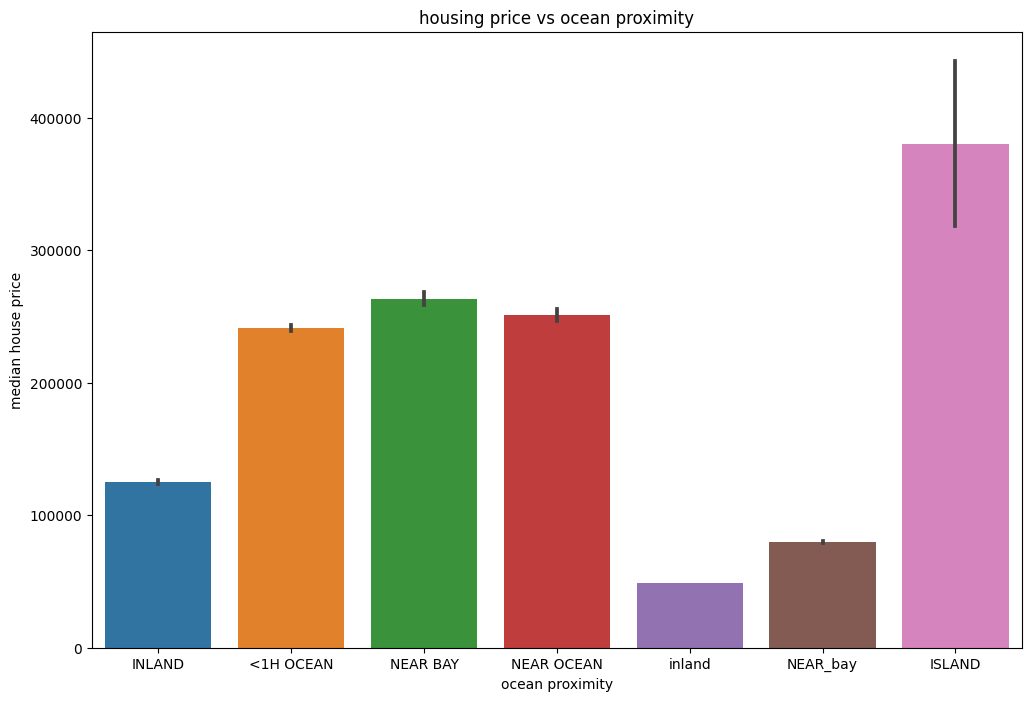

In [21]:
df = pd.read_csv('housing_dataset.csv')
plt.figure(figsize=(12, 8))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('housing price vs ocean proximity')
plt.ylabel('median house price')
plt.xlabel('ocean proximity')
plt.show()

2 Analyze the relationship between median income and housing prices <br>



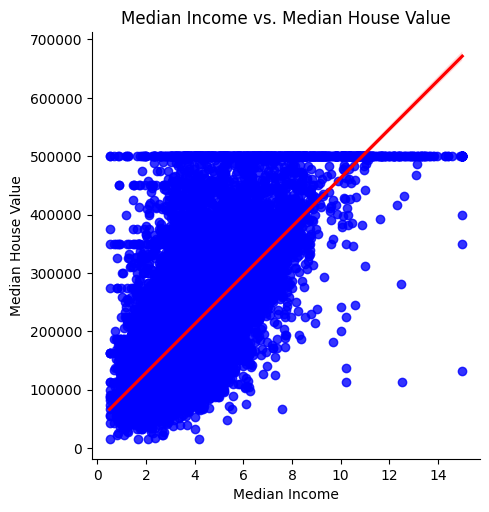

In [22]:
# Visualize the relationship between median income and housing prices using a scatter plot with a regression line
sns.lmplot(x='median_income', y='median_house_value', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.show()

ML Model Training and Testing Tasks (14 Points):
1. (1 point) Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing)

<h2>
1. ENCODING THE DATA
</h2>

In [23]:
dfnew = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

for i in dfnew.select_dtypes(include=['float64', 'int64']).columns:
    dfnew[i].fillna(dfnew[i].median(), inplace=True)

for i in dfnew.select_dtypes(exclude=['float64', 'int64']).columns:
    mode_val = dfnew[i].mode()[0]
    dfnew[i].fillna(mode_val, inplace=True)

In [ ]:
X = dfnew.drop('median_house_value', axis=1)
y = dfnew['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Train a linear regression model as a baseline model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4888061805.542042


3) Print the learned coefficients (weights) of the model.

In [ ]:
print('Learned coefficients:')
for feature, coef in zip(X_train.columns, model.coef_):
    print(feature, ':', coef)

Learned coefficients:
longitude : -27160.881626728373
latitude : -25810.09064411229
housing_median_age : 1044.367933596722
total_rooms : -3.9732266870087187
total_bedrooms : 76.56375690333789
population : -44.310950408191275
households : 78.94385083380848
median_income : 38537.98168062622
ocean_proximity_INLAND : -40083.01802575634
ocean_proximity_ISLAND : 152825.16713826556
ocean_proximity_NEAR BAY : -4122.8048850506075
ocean_proximity_NEAR OCEAN : 4206.7433656409
ocean_proximity_NEAR_bay : -89679.24924479544
ocean_proximity_inland : -48703.69793202106


4) Evaluate the model's performance on the test set using the following metrics:
a. Mean Absolute Error (MAE)
b. Mean Squared Error (MSE)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print('Evaluation metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Evaluation metrics:
Mean Absolute Error: 49972.221152144215
Mean Squared Error: 4888061805.542042


5) Try 2 other regression algorithms and compare their performance to the linear
regression baseline

In [ ]:

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

print('Decision Tree Regression - Mean Absolute Error:', dt_mae)
print('Decision Tree Regression - Mean Squared Error:', dt_mse)




Decision Tree Regression - Mean Absolute Error: 44215.56976744186
Decision Tree Regression - Mean Squared Error: 4830618809.295543


In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print('Random Forest Regression - Mean Absolute Error:', rf_mae)
print('Random Forest Regression - Mean Squared Error:', rf_mse)



Random Forest Regression - Mean Absolute Error: 32119.64178052326
Random Forest Regression - Mean Squared Error: 2431528542.9064927
